In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
def build_mlp(hidden_layers=[64, 32], activation="relu"):
    model = Sequential()

    # First hidden layer with input
    model.add(Dense(hidden_layers[0], input_dim=X.shape[1], activation=activation))

    # Additional hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))

    # Output layer (3 classes for Iris)
    model.add(Dense(y.shape[1], activation="softmax"))

    # Compile model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [ ]:
configs = [
    {"hidden_layers": [32], "activation": "relu"},
    {"hidden_layers": [64, 32], "activation": "relu"},
    {"hidden_layers": [128, 64, 32], "activation": "tanh"},
    {"hidden_layers": [64, 64], "activation": "sigmoid"},
]

histories = {}
results = {}

for i, cfg in enumerate(configs, 1):
    print(f"\nTraining Model {i} with {cfg}")
    model = build_mlp(hidden_layers=cfg["hidden_layers"], activation=cfg["activation"])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=8,
        verbose=0
    )

    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

    histories[f"Model {i}"] = history
    results[f"Model {i}"] = {"loss": loss, "accuracy": acc}



Training Model 1 with {'hidden_layers': [32], 'activation': 'relu'}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.9667, Test Loss: 0.1793

Training Model 2 with {'hidden_layers': [64, 32], 'activation': 'relu'}
Test Accuracy: 0.9333, Test Loss: 0.0842

Training Model 3 with {'hidden_layers': [128, 64, 32], 'activation': 'tanh'}
Test Accuracy: 0.9667, Test Loss: 0.0544

Training Model 4 with {'hidden_layers': [64, 64], 'activation': 'sigmoid'}
Test Accuracy: 0.9667, Test Loss: 0.1549


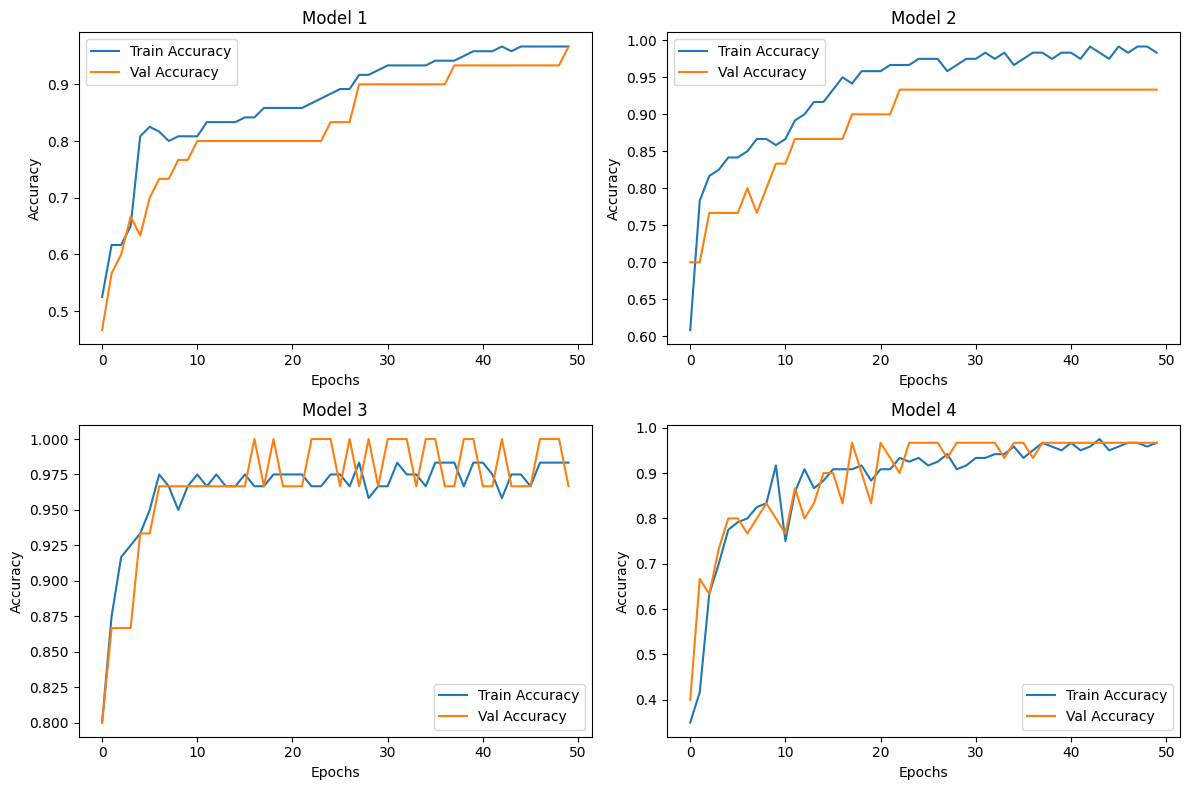

In [ ]:
..

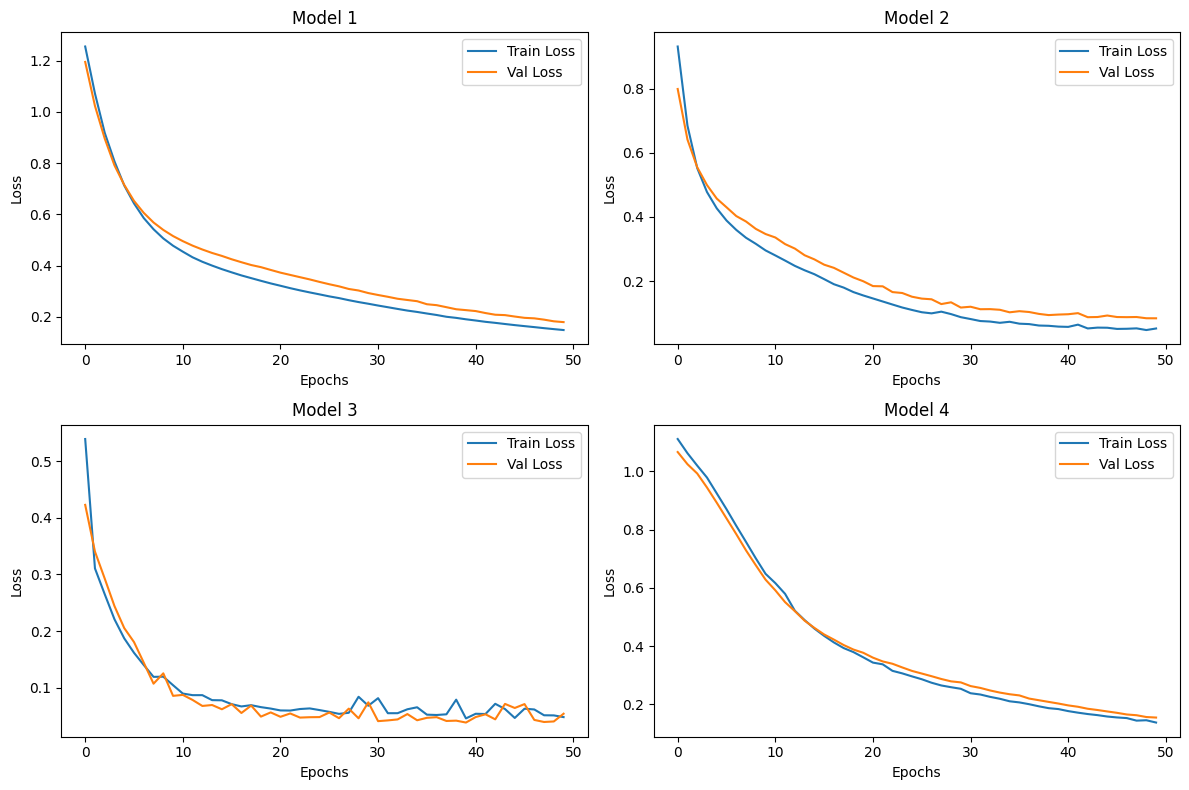

In [ ]:
plt.figure(figsize=(12, 8))

for i, (name, history) in enumerate(histories.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(name)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("\nFinal Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.4f}, Loss={metrics['loss']:.4f}")



Final Results:
Model 1: Accuracy=0.9333, Loss=0.1939
Model 2: Accuracy=0.9333, Loss=0.0874
Model 3: Accuracy=0.9667, Loss=0.0440
Model 4: Accuracy=0.9667, Loss=0.1574
